In [1]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
x= tf.Variable(-1.0)
with tf.GradientTape() as tape:
    y = 3*x**2+4*x+4
print(tape.gradient(y,x))

tf.Tensor(-2.0, shape=(), dtype=float32)


GradientTape calculates gradients for given Variables using *automatic differentiation*.\
The simplest example:

In [3]:
x = tf.Variable(4.0)
with tf.GradientTape() as tape:
    y = 7*x+3

# gradient g(y/x)
print(tape.gradient(y,x))

tf.Tensor(7.0, shape=(), dtype=float32)


The example for quadratic function

In [4]:
x = tf.Variable(4.0)
with tf.GradientTape() as tape:
    y = x*x

# gradient g(y/x)
print(tape.gradient(y,x))

tf.Tensor(8.0, shape=(), dtype=float32)


The list of values is also a Variable

In [5]:
x = tf.Variable(np.array((1,2,3,4),dtype=float))
with tf.GradientTape() as tape:
    y = x*x
print('x=',x)
print('y=',y)
gradient = tape.gradient(y,x)
print('gradient=',gradient)

x= <tf.Variable 'Variable:0' shape=(4,) dtype=float64, numpy=array([1., 2., 3., 4.])>
y= tf.Tensor([ 1.  4.  9. 16.], shape=(4,), dtype=float64)
gradient= tf.Tensor([2. 4. 6. 8.], shape=(4,), dtype=float64)


### Task: find coefficient 'a' in function: y = a\*x when some pairs (x,y) are given
Method using the _Gradient Descent_ algorithm: 
- initialize a=0
- for every iteration:
-- calculate loss
-- calculate gradient d_loss/d_a
-- modify a in the direction opposite to the gradient (a = a - gradient\*learning_rate)

Example using the simplest Gradient Descent algorithm:

x= [1. 2. 3. 4.]
y= [1.3 2.6 3.9 5.2]
----step  0 -----
loss= [0.29999995 0.5999999  0.9000001  1.1999998 ]
gradient= -10.0
a= 1.05
----step  1 -----
loss= [0.25       0.5        0.75000024 1.        ]
gradient= -10.0
a= 1.0999999
----step  2 -----
loss= [0.20000005 0.4000001  0.6000004  0.8000002 ]
gradient= -10.0
a= 1.1499999
----step  3 -----
loss= [0.1500001  0.3000002  0.45000052 0.6000004 ]
gradient= -10.0
a= 1.1999998
----step  4 -----
loss= [0.10000014 0.20000029 0.30000067 0.40000057]
gradient= -10.0
a= 1.2499998
----step  5 -----
loss= [0.05000019 0.10000038 0.15000081 0.20000076]
gradient= -10.0
a= 1.2999997
----step  6 -----
loss= [2.3841858e-07 4.7683716e-07 9.5367432e-07 9.5367432e-07]
gradient= -10.0
a= 1.3499997
----step  7 -----
loss= [0.04999971 0.09999943 0.14999914 0.19999886]
gradient= 10.0
a= 1.2999997
----step  8 -----
loss= [2.3841858e-07 4.7683716e-07 9.5367432e-07 9.5367432e-07]
gradient= -10.0
a= 1.3499997
----step  9 -----
loss= [0.04999971 0.09999943 0.1499

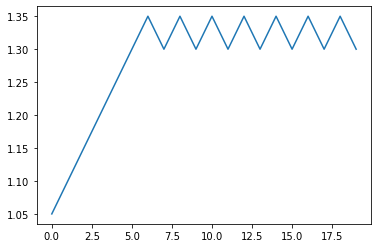

In [6]:
X = np.array((1,2,3,4),dtype=float)
Y = np.asarray([i*1.3 for i in X]) # y = 1.3 * x
print('x=',X)
print('y=',Y)
step_no=0
a_vals_simple = []
a = tf.Variable(1.0)
for _ in range(20):
    print('----step ',step_no,'-----')
    step_no+=1
    with tf.GradientTape() as tape:
        pred_Y = a*X
        loss = tf.abs(pred_Y-Y) # loss is the difference between the current model and ground truth
    print('loss=',loss.numpy())
    # gradient of d_loss/d_a
    gradient = tape.gradient(loss,a)
    print('gradient=',gradient.numpy())
    # substract from 'a' the gradient multiplied by learning_rate=0.005
    a.assign_sub(gradient * 0.005)
    a_vals_simple.append(a.numpy())
    print('a=',a.numpy()) # new (better) value of a
print('Final a=',a)
plt.plot(a_vals_simple)

Problem: the gradient for linear function is always sum(X) (10 or -10) and when the learning rate is not changing it 'jumps' over the correct solution.

Another attempt - with ADAM optimizer

x= [1. 2. 3. 4.]
y= [1.3 2.6 3.9 5.2]
----step  0 -----
loss= [0.29999995 0.5999999  0.9000001  1.1999998 ]
gradient= -10.0
learning_rate= 0.05
a= 1.05
----step  1 -----
loss= [0.25       0.5        0.75000024 1.        ]
gradient= -10.0
learning_rate= 0.05
a= 1.0999998
----step  2 -----
loss= [0.20000017 0.40000033 0.60000086 0.80000067]
gradient= -10.0
learning_rate= 0.05
a= 1.15
----step  3 -----
loss= [0.14999998 0.29999995 0.4500003  0.5999999 ]
gradient= -10.0
learning_rate= 0.05
a= 1.1999998
----step  4 -----
loss= [0.10000014 0.20000029 0.30000067 0.40000057]
gradient= -10.0
learning_rate= 0.05
a= 1.2499996
----step  5 -----
loss= [0.05000031 0.10000062 0.15000105 0.20000124]
gradient= -10.0
learning_rate= 0.05
a= 1.2999997
----step  6 -----
loss= [2.3841858e-07 4.7683716e-07 9.5367432e-07 9.5367432e-07]
gradient= -10.0
learning_rate= 0.05
a= 1.3499997
----step  7 -----
loss= [0.04999971 0.09999943 0.14999914 0.19999886]
gradient= 10.0
learning_rate= 0.05
a= 1.3824414
----step 

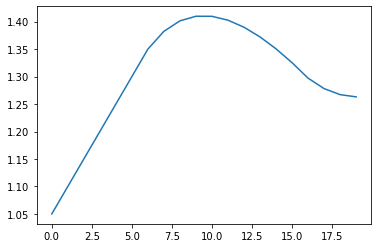

In [7]:
# with optimizer NO DECAY
opt = tf.keras.optimizers.Adam(learning_rate=0.05
#                               , decay=0.01    ## when decay is used the learning rate decreases!
                              )

X = np.array((1,2,3,4),dtype=float)
Y = np.asarray([i*1.3 for i in X]) # y = 1.3 *  x
print('x=',X)
print('y=',Y)
step_no=0
a_vals_adam = []
a = tf.Variable(1.0)
for _ in range(20):
    print('----step ',step_no,'-----')
    step_no+=1
    with tf.GradientTape() as tape:
        pred_Y = a*X
        loss = tf.abs(pred_Y-Y) # loss is the difference between the model and ground truth
    print('loss=',loss.numpy())
    # gradient of d_loss/d_a
    gradient = tape.gradient(loss,a)
    print('gradient=',gradient.numpy())

    # substract from 'a' the gradient multiplied by learning_rate=0.005
    ## a.assign_sub(gradient * 0.005)
    
    opt.apply_gradients(zip([gradient],[a]))
    print('learning_rate=',opt._decayed_lr(tf.float32).numpy())
    a_vals_adam.append(a.numpy())
    print('a=',a.numpy()) # new (better) value of a
print('Final a=',a)
plt.plot(a_vals_adam)

x= [1. 2. 3. 4.]
y= [1.3 2.6 3.9 5.2]
----step  0 -----
loss= [0.29999995 0.5999999  0.9000001  1.1999998 ]
gradient= -10.0
learning_rate= 0.04950495
a= 1.05
----step  1 -----
loss= [0.25       0.5        0.75000024 1.        ]
gradient= -10.0
learning_rate= 0.04901961
a= 1.0995047
----step  2 -----
loss= [0.20049524 0.4009905  0.60148597 0.801981  ]
gradient= -10.0
learning_rate= 0.04854369
a= 1.1485244
----step  3 -----
loss= [0.15147555 0.3029511  0.45442677 0.6059022 ]
gradient= -10.0
learning_rate= 0.048076924
a= 1.197068
----step  4 -----
loss= [0.10293198 0.20586395 0.30879617 0.4117279 ]
gradient= -10.0
learning_rate= 0.047619052
a= 1.2451447
----step  5 -----
loss= [0.05485523 0.10971045 0.16456604 0.21942091]
gradient= -10.0
learning_rate= 0.047169816
a= 1.2927638
----step  6 -----
loss= [0.00723612 0.01447225 0.02170849 0.02894449]
gradient= -10.0
learning_rate= 0.04672897
a= 1.3399336
----step  7 -----
loss= [0.03993368 0.07986736 0.11980104 0.15973473]
gradient= 10.0
learn

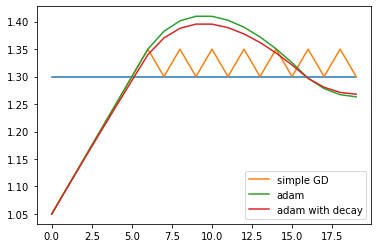

In [8]:
# with optimizer ADN DECAY
opt = tf.keras.optimizers.Adam(learning_rate=0.05
                               , decay=0.01    ## when decay is used the learning rate decreases!
                              )

X = np.array((1,2,3,4),dtype=float)
Y = np.asarray([i*1.3 for i in X]) # y = 1.3 *  x
print('x=',X)
print('y=',Y)
step_no=0
a_vals_adam_dc = []
a = tf.Variable(1.0)
for _ in range(20):
    print('----step ',step_no,'-----')
    step_no+=1
    with tf.GradientTape() as tape:
        pred_Y = a*X
        loss = tf.abs(pred_Y-Y) # loss is the difference between the model and ground truth
    print('loss=',loss.numpy())
    # gradient of d_loss/d_a
    gradient = tape.gradient(loss,a)
    print('gradient=',gradient.numpy())

    # substract from 'a' the gradient multiplied by learning_rate=0.005
    ## a.assign_sub(gradient * 0.005)
    
    opt.apply_gradients(zip([gradient],[a]))
    print('learning_rate=',opt._decayed_lr(tf.float32).numpy())
    a_vals_adam_dc.append(a.numpy())
    print('a=',a.numpy()) # new (better) value of a
print('Final a=',a)
plt.plot([1.3]*20)
plt.plot(a_vals_simple,label='simple GD')
plt.plot(a_vals_adam, label='adam')
plt.plot(a_vals_adam_dc, label='adam with decay')
plt.legend(loc='lower right')

### Task: find coefficient 'a' and 'b' in function: y = a\*x+b when some pairs (x,y) are given
A classic linear regression task!

_Step()_ function that performs one step of optimization:

In [9]:
def step(step_no,real_x, real_y, opt=None, verbose=1, lr=0.01):
    with tf.GradientTape() as tape:
        # Make prediction
        pred_y = a * real_x + b
        # Calculate loss
        loss = tf.abs(real_y - pred_y)
        #loss = (real_y-pred_y)**2
    # Calculate gradients
    a_gradients, b_gradients = tape.gradient(loss, (a, b))

    # Update variables
    if not opt==None:
        opt.apply_gradients(zip([a_gradients],[a]))
        opt.apply_gradients(zip([b_gradients],[b]))
    else:
        a.assign_sub(a_gradients * lr)
        b.assign_sub(b_gradients * lr)
        
    if verbose:
        print("=========== STEP ",step_no,' =================')
        #print('loss',loss.numpy())
        print('a_gradients',a_gradients.numpy())
        print('b_gradients',b_gradients.numpy())
        print('a',a.numpy())
        print('b',b.numpy())
    return a.numpy(),b.numpy()    


An example with direct output

In [10]:
X = np.asarray([0, 1, 2, 3, 4])
Y = np.asarray([i*1.3+0.5 for i in X]) # y = 1.3*x+0.5
opt = tf.keras.optimizers.Adam(learning_rate=0.05 , decay=0.01)

print("-"*100)
print("Without optimizer")
# Two trainable variables
a = tf.Variable(1.0)
b = tf.Variable(1.0)
for i in range(10):
    step(i,X,Y,verbose=1)
print("-"*100)
print("With optimizer")
# Two trainable variables
a = tf.Variable(1.0)
b = tf.Variable(1.0)
for i in range(10):
    step(i,X,Y,opt=opt,verbose=1)

----------------------------------------------------------------------------------------------------
Without optimizer
=========== STEP  0  =================
a_gradients -8.0
b_gradients -1.0
a 1.08
b 1.01
=========== STEP  1  =================
a_gradients -4.0
b_gradients 1.0
a 1.12
b 1.0
=========== STEP  2  =================
a_gradients -4.0
b_gradients 1.0
a 1.16
b 0.99
=========== STEP  3  =================
a_gradients 2.0
b_gradients 3.0
a 1.14
b 0.96000004
=========== STEP  4  =================
a_gradients -4.0
b_gradients 1.0
a 1.18
b 0.95000005
=========== STEP  5  =================
a_gradients 2.0
b_gradients 3.0
a 1.16
b 0.9200001
=========== STEP  6  =================
a_gradients -1.0
b_gradients 2.0
a 1.17
b 0.9000001
=========== STEP  7  =================
a_gradients 2.0
b_gradients 3.0
a 1.15
b 0.8700001
=========== STEP  8  =================
a_gradients -4.0
b_gradients 1.0
a 1.1899999
b 0.86000013
=========== STEP  9  =================
a_gradients 2.0
b_gradients 3.0
a

An example with visualization

opt= 1.3146577 0.42031994
nopt= 1.1239991 0.98700017


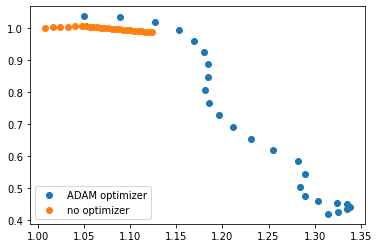

In [11]:
EPOCHS=25
opt = tf.keras.optimizers.Adam(learning_rate=0.05 , decay=0.01)

a = tf.Variable(1.0)
b = tf.Variable(1.0)
a_opt = []
b_opt = []

for i in range(EPOCHS):
    ax,bx = step(i,X,Y,verbose=0,opt=opt)
    a_opt.append(ax)
    b_opt.append(bx)
plt.scatter(a_opt,b_opt,label='ADAM optimizer')
print("opt=",a.numpy(),b.numpy())

a = tf.Variable(1.0)
b = tf.Variable(1.0)
a_nopt = []
b_nopt = []

for i in range(EPOCHS):
    ax,bx = step(i,X,Y,verbose=0,lr=0.001)
    a_nopt.append(ax)
    b_nopt.append(bx)
plt.scatter(a_nopt,b_nopt,label="no optimizer")
print("nopt=",a.numpy(),b.numpy())

plt.legend(loc='lower left')

Real data

result= 1.4272459 1.8285356
error 110.73478


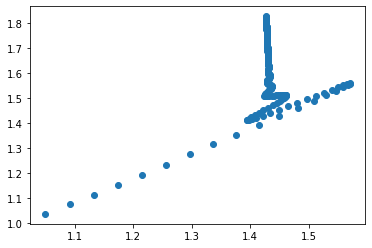

In [12]:
EPOCHS=200
opt = tf.keras.optimizers.Adam(learning_rate=0.05 , decay=0.01)

data = np.genfromtxt('data.csv', delimiter=',', skip_header=1)
X = data[:, 0]
Y = data[:, 1]

a = tf.Variable(1.0)
b = tf.Variable(1.0)
a_opt = []
b_opt = []

for i in range(EPOCHS):
    #ax,bx = step(i,X,Y,verbose=0,lr=0.00001)
    ax,bx = step(i,X,Y,verbose=0,opt=opt)
    a_opt.append(ax)
    b_opt.append(bx)
plt.scatter(a_opt,b_opt,label='ADAM optimizer')
print("result=",a.numpy(),b.numpy())

E2 = ((Y-(a*X+b))**2).numpy().mean()
print("error",E2)